# 1.Import libraries

In [5]:
#Python libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import copy
import os
import sys

In [6]:
cwd = os.getcwd()
sys.path.append(cwd+'/modules')

In [7]:
#My libraries
from modules.NN_read_and_format import file_to_numpyarray, concatenate_entangled_and_separable_arrays, split_array_train_test, split_array_input_label
from modules.NN_train_and_test import binaryOutput_formatData_trainNN_averageLoss_averageTestResults_and_writeResults

# 3. Train ANN

## 3.1. Example of how the formatting functions work

Example with some toy data to make sure that all of these function operate as they are intended to:

In [ ]:
current_working_directory = os.getcwd()
print(current_working_directory)

In [ ]:
firstfilepath = current_working_directory+'/firsttoydata.txt'
secondfilepath = current_working_directory+'/secondtoydata.txt'

In [ ]:
#It is important that both arrays, the entangled matrices one and the separable ones are generated according to the same criteria, i.e. with redundacy or without it.
#Otherwise, they won't concatenate succesfully.
firstarray = file_to_numpyarray(firstfilepath, 2, 0.0, False)
secondarray = file_to_numpyarray(secondfilepath, 2, -1.0, False)

In [ ]:
print(firstarray)
print(secondarray)

In [ ]:
concatenatedarray = concatenate_entangled_and_separable_arrays(firstarray, secondarray, True)
print(concatenatedarray)

In [ ]:
training_set, test_set = split_array_train_test(concatenatedarray, 0.4)
print(training_set)
print(test_set)

In [ ]:
x_train, y_train, input_shape = split_array_input_label(training_set)
x_test, y_test, _ = split_array_input_label(test_set)
print(x_train)
print(y_train)
print(x_test)
print(y_test)
print(input_shape)

# 4. Entanglement in $\mathcal{H}_2\otimes\mathcal{H}_2\otimes\mathcal{H}_2$

The following statement shows the current working directory

In [8]:
cwd = os.getcwd()
print(cwd)

/home/julio/Documents/jupyterenvironment/TFM/code/entanglement_2x2x2


In [19]:
first_filepath = cwd+'/input_data/100k/separable.txt'
second_filepath = cwd+'/input_data/100k/bipartite_entanglement.txt'

In [20]:
additional_separable_filepaths = []
additional_separable_filepaths.append(cwd+'/input_data/100k/separable.txt')
additional_separable_filepaths.append(cwd+'/input_data/100k/separable.txt')
additional_entangled_filepaths = []
additional_entangled_filepaths.append(cwd+'/input_data/100k/GHZ.txt')
additional_entangled_filepaths.append(cwd+'/input_data/100k/W.txt')

In [21]:
N=8;                                    #Dimension of the hilbert space.
howManyTimes = 10;                       #The simulation is launched howManyTimes times and the result is averaged over all of them
architecture = [256,128,64,32,16,1];       #Number of layers and number of neurons in each layer 
max_nepochs = 100;                       #Number of training epochs to perform
fraction=0.75;                          #Fraction of vector states used to train the NN      
actHL = 'relu';                         #Activation function in the hidden layers
lastAct = 'sigmoid';                    #Activation function in the output layer
loss_f = 'binary_crossentropy'          #Loss function
batch_size = 40;                        #Batch size
#WARNING: The output path you specify here must match an already existing (maybe blank) file. Otherwise the function loses the results.
output_file = cwd + '/results/definitive_results/rmsprop_trials/BE.txt' #CHANGE THIS ASAP! BE CAREFUL NOT TO OVERWRITE EXISTING RESULTS!
opt = 'rmsprop'                            #Learning algorithm optimizer
take_supplementary_tests = True         #Whether to test the (already) trained networks over additional datasets
tol = 0.5                               #Tolerance when testing the model prediction against the expected true value.
study_val_loss = True                  #Whether to get the evolution of the loss function over the validation data.
early_stopping = True                  #Whether to make use of the keras callback EarlyStopping.
skipped_rows = (0,0,0,0,0,0)                    #Rows to skip when reading the datasets.
pre_shuffle = True                      #Whether to shuffle or not the datasets before training.
first_type = 'separable'                #String referring to the type of quantum states in the first dataset.
second_type= 'Bipartitely entangled'                      #ÍDEM, second dataset.
metric = 'val_loss'                     #Metric monitored by EarlyStopping.
epochs_to_wait = 15                     #Patience given to EarlyStopping.
min_delta = 1e-3                        #Minimum variation to assess whether the network continues to make improvements in its training.

In [22]:
%%time
loss_evolution, loss_evolution_std, ASR, ASRSTD, ASR2, ASRSTD2, val_loss, val_loss_std, reached_this_epoch, longest_training = binaryOutput_formatData_trainNN_averageLoss_averageTestResults_and_writeResults(N, howManyTimes, first_filepath, first_type, second_filepath, second_type, architecture, max_nepochs, fraction, actHL, lastAct, loss_f, batch_size, optimizer=opt, perform_additional_tests=take_supplementary_tests, first_test_filepath=additional_separable_filepaths, second_test_filepath=additional_entangled_filepaths, outFilePath=output_file, tolerance=tol,use_validation_data=study_val_loss, trigger_early_stopping=early_stopping, metric_to_monitor=metric, epochs_patience=epochs_to_wait, min_improvement=min_delta, monitor_mode='min', baseline=None, recover_best_configuration=True, first_label=0.0, second_label=1.0, shuffle=pre_shuffle, rts=skipped_rows, verb=0, snitch_every=1)

Progress:  10.0 %
Progress:  20.0 %
Progress:  30.0 %
Progress:  40.0 %
Progress:  50.0 %
Progress:  60.0 %
Progress:  70.0 %
Progress:  80.0 %
Progress:  90.0 %
Progress:  100.0 %
CPU times: user 55min 54s, sys: 4min 20s, total: 1h 15s
Wall time: 30min 7s


In [13]:
print(reached_this_epoch)
print(longest_training)

[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10  9  9  9  9  9  9  9  9  9  9  9  9  9  8  8  8
  8  8  7  5  5  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  2  2
  2  2  2  1  1  1  1  1  1  1]
82


# 5. Preview results

In [33]:
#savepath = '/home/julio/Documents/my_projects/TFM/code/entanglement_2x2/results/negativitywise/pure_states/long_difficult_training_sigmoid_1'

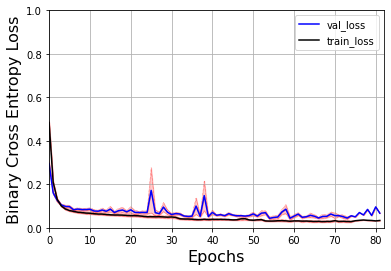

In [14]:
x = range(longest_training)
plt.grid()
plt.plot(x,loss_evolution+loss_evolution_std, linewidth=0.5, linestyle=':', color='red')
plt.plot(x,loss_evolution-loss_evolution_std, linewidth=0.5, linestyle=':', color='red')
plt.fill_between(x, loss_evolution, loss_evolution+loss_evolution_std, alpha = 0.2, color='red')
plt.fill_between(x, loss_evolution, loss_evolution-loss_evolution_std, alpha = 0.2, color='red')
if study_val_loss == True:
    plt.plot(x,val_loss+val_loss_std, linewidth=0.5, linestyle=':', color='red')
    plt.plot(x,val_loss-val_loss_std, linewidth=0.5, linestyle=':', color='red')
    plt.fill_between(x, val_loss, val_loss+val_loss_std, alpha = 0.2, color='red')
    plt.fill_between(x, val_loss, val_loss-val_loss_std, alpha = 0.2, color='red')
    plt.plot(x,val_loss, color='blue', label='val_loss' )
plt.plot(x,loss_evolution, color='black', label='train_loss')
plt.xlabel('Epochs', size=16)
plt.ylabel('Binary Cross Entropy Loss', size=16)
plt.xlim((0,longest_training))
plt.ylim((0,1))
plt.legend(loc='best')
#plt.savefig(savepath, format='png')
plt.show()

In [ ]:
print(100*average_success_rate,'% +/- ',100* average_success_rate_std,'%')

## ¡CHANGE THE OUTPUT PATH! ¡BE CAREFUL NOT TO OVERWRITE EXISTING RESULTS!

# 9. Miscellanea and Ideas for the future


IDEA: Hacer dos experimentos. Uno: introducir toda la matriz densidad con redundancia, esto es, sin quitar el triańgulo inferior de la matriz densidad. Dos: limpiar los datos e introducirlos sin redundancia.



Quizás sería interesante repetir todas las simulaciones con la misma inicialización. Si la gran desviación que hay a épocas medias es, tal y como creo, porque la inicialización de los parámetros hace que el sistema comience en puntos dispares del espacio de parámetros entrenables y que la caída hacia mínimos locales de la función de pérdidas sea distinta, entonces repetir todas las simulaciones con exactamente la misma inicialización debe de hacer que dicha desviación disminuya mucho.

Eventualmente, debería retirar esa ligadura de inicialización fija para demostrar que, aunque la inicialización aleatoria lleve a aumentar mucho la desviación estándar, independientemente de la inicialización la red MLP termina siempre llevando a cabo la tarea correctamente, esto es, que a épocas grandes la desviación estandar entorno a la función de pérdidas se hace siempre cero.
